<a href="https://colab.research.google.com/github/camminady/DataVisJune/blob/master/main_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
import matplotlib
import geopandas
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-agf7f1aa
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-agf7f1aa
  Stored in directory: /tmp/pip-ephem-wheel-cache-rd4vc8lg/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [0]:
# Read data
df2015 = pd.read_csv("https://raw.githubusercontent.com/camminady/DataVisJune/master/2015.csv")
df2016 = pd.read_csv("https://raw.githubusercontent.com/camminady/DataVisJune/master/2016.csv")
df2017 = pd.read_csv("https://raw.githubusercontent.com/camminady/DataVisJune/master/2017.csv")

# Add year
df2015['Year'] = 2015
df2016['Year'] = 2016
df2017['Year'] = 2017

# Naming convention for the df2017 is slightly off, we fix this.
df2017.rename(columns={
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Whisker.low': 'Whisker low',
    'Whisker.high': 'Whisker high',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
    'Dystopia.Residual':'Dystopia Residual'
    },inplace=True)

# Merge together
df = df2015.merge(df2016,how='outer').merge(df2017,how='outer')

# We rename some countries so they correspond to the naming in geopandas alter on
df.rename(columns={"Country":"name"},inplace=True)

old = ['Ivory Coast','Palestinian Territories','Bosnia and Herzegovina','Congo (Kinshasa)','Czech Republic','Central African Republic',
      'United States','Dominican Republic','Somaliland region']
new = ["Côte d'Ivoire",'Palestine','Bosnia and Herz.','Dem. Rep. Congo','Czechia','Central African Rep.',
      'United States of America','Dominican Rep.','Somalia']

for pos,o in enumerate(old):
    df.loc[df.name == o, "name" ] = new[pos]

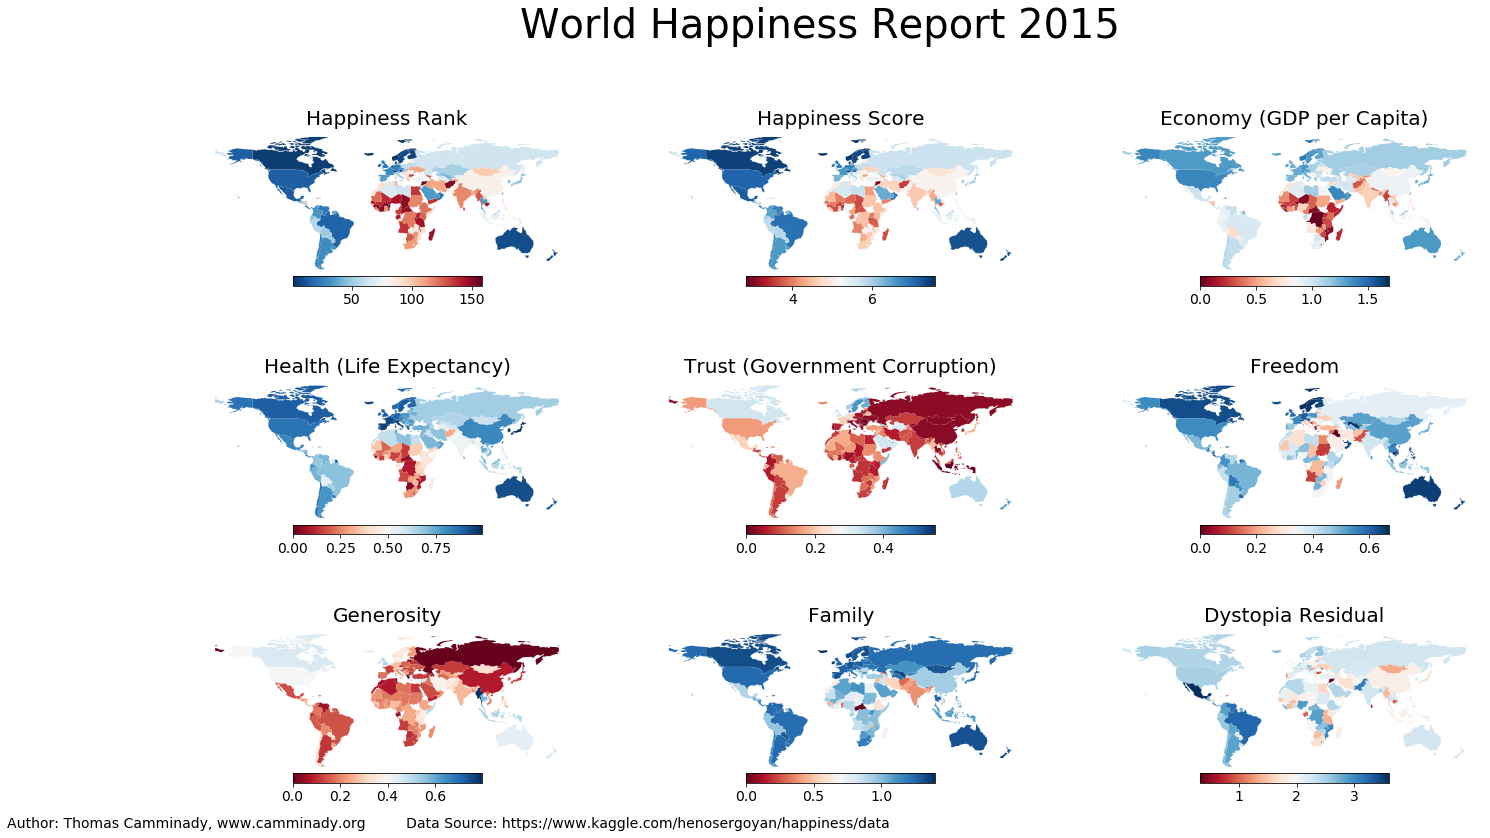

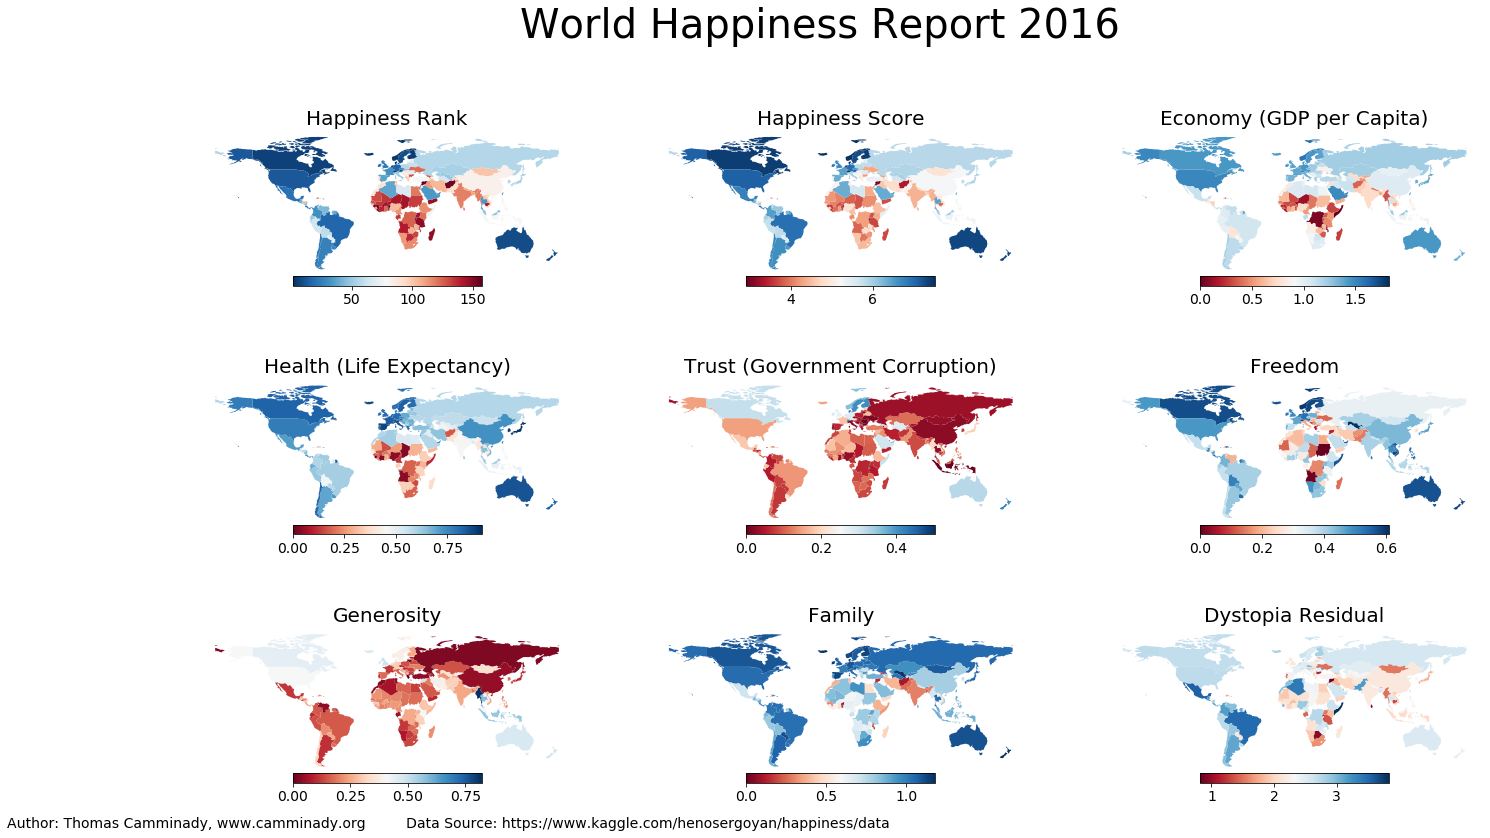

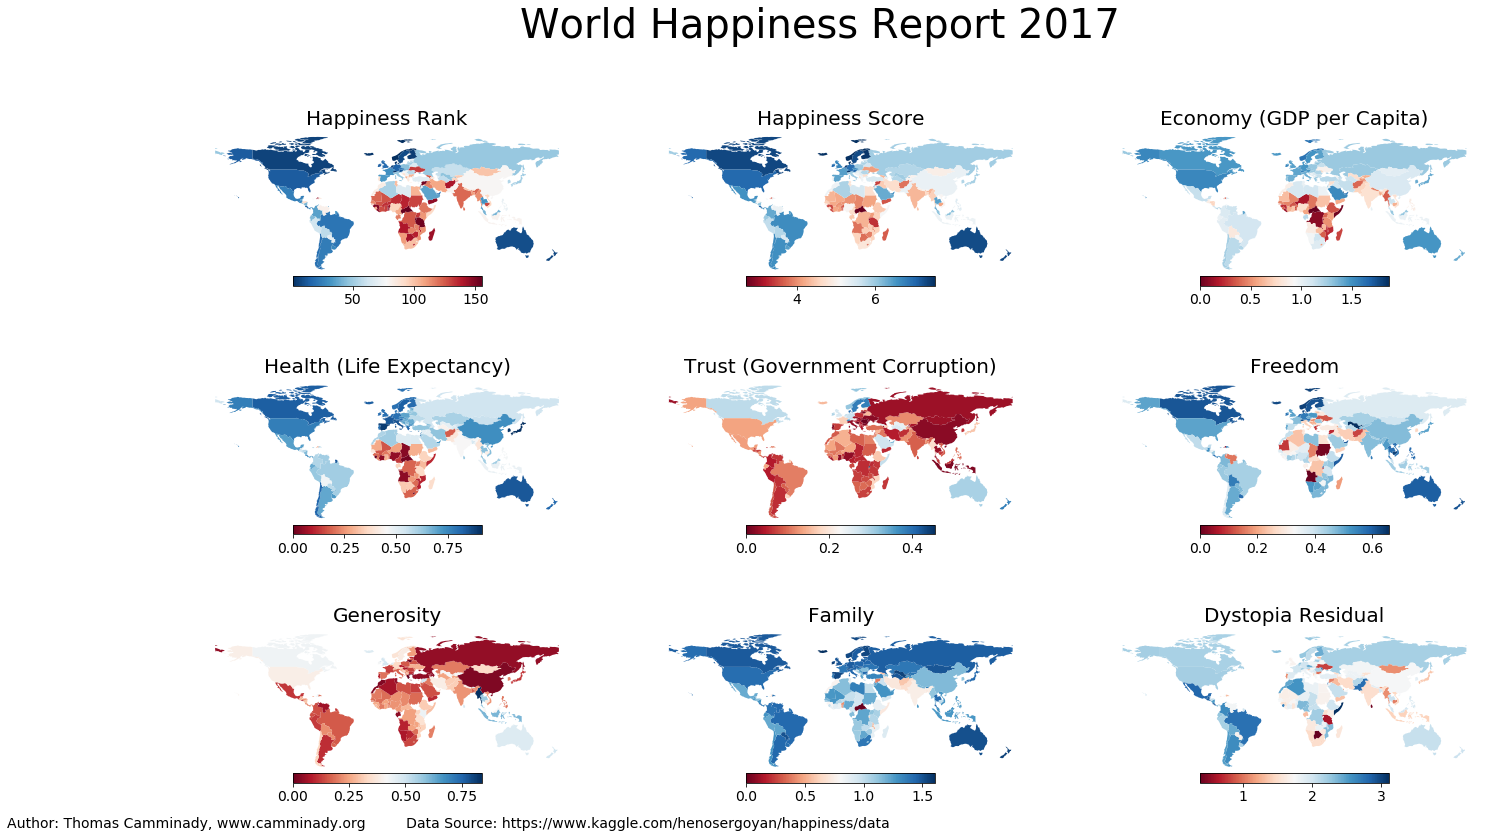

In [43]:
colorscheme = "RdBu"

shrinking = 0.20

# Create directory for figure output
os.system("mkdir -p figs")
for year in [2015,2016,2017]:
    counter = 0
    fig, axs = plt.subplots(3,3,figsize=(3*shrinking*1920/50,3*shrinking*1080/50))
    fig.suptitle('World Happiness Report {}'.format(year),fontsize=shrinking*200) # or plt.suptitle('Main title')
    plt.text(0.01, 0.1, 'Author: Thomas Camminady, www.camminady.org         Data Source: https://www.kaggle.com/henosergoyan/happiness/data', fontsize=14, transform=plt.gcf().transFigure)
    for item in ['Happiness Rank','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Trust (Government Corruption)','Freedom',
            "Generosity",'Family','Dystopia Residual']:
      
        ax = axs[counter//3, counter%3]
        
        # Take world data from geopandas and merge with our data
        world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
        world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
        #world = world.to_crs({'init': 'epsg:3395'}) # world.to_crs(epsg=3395) would also work

        # Filter by year
        dff = df.loc[df.Year == year].copy()
        # Merge
        world = world.merge(dff.filter(items=['name',item]),how='left',on='name')
        world.dropna(inplace=True)
        
        # Create figure and plot
        
        ax.axis('off')
        cmap = "{}_r".format(colorscheme) if item=="Happiness Rank" else colorscheme
        world.plot(column=item,cmap=cmap,ax=ax, legend=False)
        ax.set_title("{}".format(item),fontsize=shrinking*100)
        
        # Deal with colorbar    
        sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=min(world[item]), vmax=max(world[item])))
        sm._A = []
        cbar = plt.colorbar(sm,orientation="horizontal", pad=0,shrink=0.5,ax=ax)
        cbar.ax.tick_params(labelsize=shrinking*70)
        counter +=1
    plt.show()
       